In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving season-1819_csv.csv to season-1819_csv.csv


In [ ]:
import io
soccer_df = pd.read_csv(io.BytesIO(uploaded["season-1819_csv.csv"]))

# Stats for Home Teams vs. Stats for Aways Teams - Kyle

In [ ]:
home_team_win_df = soccer_df[soccer_df["FTR"] == "H"]
home_win_perc = len(home_team_win_df) / len(soccer_df)
home_win_perc

0.4763157894736842

In [ ]:
draw_df = soccer_df[soccer_df["FTR"] == "D"]
home_not_lose = (len(home_team_win_df) + len(draw_df)) / len(soccer_df)
home_not_lose

0.6631578947368421

The two blocks of code above indicates that for the 2018-2019 Premier League Season, the home team won 47.63% of matches and avoided a loss (won or had a draw) in 66.32% of their matches. This also means that the away team only won 33.68% of the matches so home field advantage certainly plays a factor in who wins a match. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


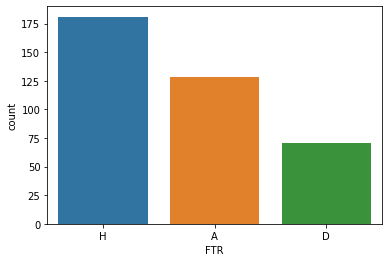

In [ ]:
import seaborn as sns
sns.countplot(soccer_df["FTR"])

The plot above shows the outcomes of the matches during the 2018-2019 Premier League Season. The home team winning was the most common match outcome, with the away team winning being the second most common outcome, and a draw being the least common outcome. 

In [ ]:
home_team_st_perc = soccer_df["HST"] / soccer_df["HS"]
home_team_st_perc.mean()

0.33983355481479893

In [ ]:
away_team_st_perc = soccer_df["AST"] / soccer_df["AS"]
away_team_st_perc.mean()

0.35725243635525794

In [ ]:
diff_shots = soccer_df["HS"] - soccer_df["AS"]
diff_shots.mean()

2.9894736842105263

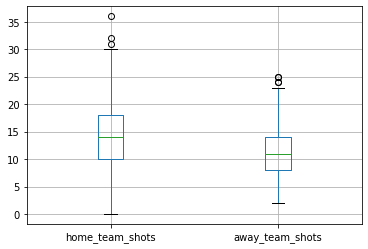

In [ ]:
shots_df = pd.DataFrame(list(zip(soccer_df["HS"],soccer_df["AS"])),columns = ["home_team_shots","away_team_shots"])
shots_df.boxplot()

The four blocks of code above are looking at shots and shots on target data for home and away teams. Home teams had 33.98% of their shots on target while away teams had 35.73% of their shots on target. Also, home teams on average attempted 2.99 more shots than away teams in a given match. The difference in distribution between amount of shots taken by the home team and amount of shots taken by the away team can be seen in the boxplot above.

In [ ]:
foul_diff = soccer_df["HF"] - soccer_df["AF"]
foul_diff.mean()

-0.15263157894736842

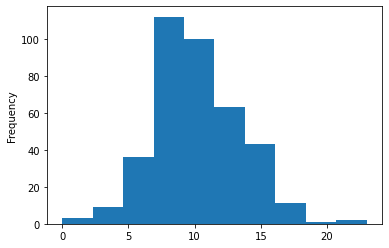

In [ ]:
soccer_df["HF"].plot(kind = "hist")

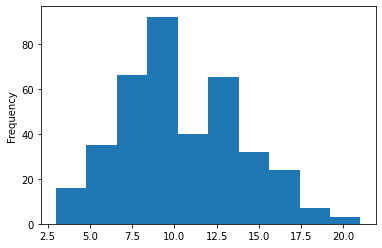

In [ ]:
soccer_df["AF"].plot(kind = "hist")

In [ ]:
card_diff = soccer_df["HY"] + soccer_df["HR"] - (soccer_df["AY"] + soccer_df["AR"])
card_diff.mean()

-0.1868421052631579

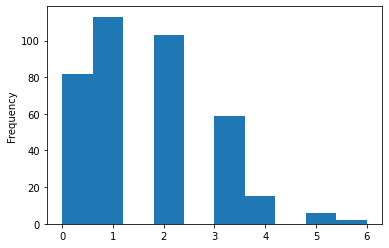

In [ ]:
home_total_cards = soccer_df["HY"] + soccer_df["HR"]
home_total_cards.plot(kind = "hist")

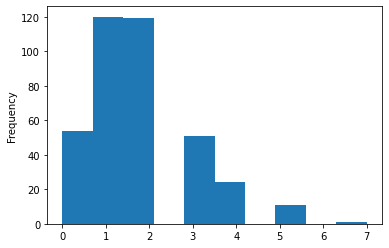

In [ ]:
away_total_cards = soccer_df["AY"] + soccer_df["AR"]
away_total_cards.plot(kind = "hist")

The six blocks of code above focus on number of fouls and total number of cards earned by home and away teams in a match. Away teams are called for slightly more fouls and given slightly more cards than home teams. But this difference doesn't appear to be too significant as the histograms comparing home team fouls and cards to away team fouls and cards are pretty similar which means the distributions of fouls and cards are pretty similar between home and away teams.

# Match Results - Avinash

In [ ]:
import matplotlib.pyplot as plt


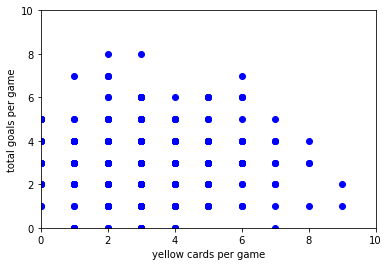

In [ ]:
#impact of yellow cards on total goals scored
yc_per_game_df = soccer_df["AY"] + soccer_df["HY"]
total_goals_per_game_df = soccer_df["FTHG"] + soccer_df["FTAG"]
plt.plot(yc_per_game_df, total_goals_per_game_df, "bo")
plt.xlabel("yellow cards per game")
plt.ylabel("total goals per game")
plt.axis([0,10,0,10])
plt.show()

The graph above looks at the potential impact that yellow cards could have on the number of goals scored in a match. Typically, a yellow card penalty puts a team at risk for giving up a goal becuase of a potential red card or a tactic switch in response to the penalty. However, it seems there is very little correlation between the the number of yellow cards and total goals scored. 

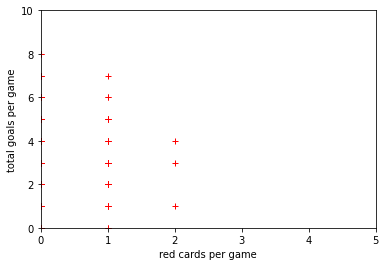

In [ ]:
rc_per_game_df = soccer_df['AR'] + soccer_df['HR']
total_goals_per_game_df = soccer_df["FTHG"] + soccer_df["FTAG"]
plt.plot(rc_per_game_df, total_goals_per_game_df, "r+")
plt.xlabel("red cards per game")
plt.ylabel("total goals per game")
plt.axis([0,5,0,10])
plt.show()


Here, I plotted the total red cards per game and the effect on the total goals per game. Originally, I thought that the effect of a red card penalty (one less person on the field) would result in more goals. However, the impact wasn't much greater than if no red cards were awarded that game. 

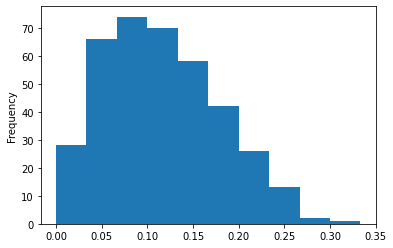

In [ ]:
#plot finishing accuracy for all games in a histogram
total_shots = soccer_df["HS"] + soccer_df["AS"]
total_goals_per_game = (soccer_df["FTHG"] + soccer_df["FTAG"])
finishing_pct = total_goals_per_game / total_shots
finishing_pct.plot(kind = "hist")


This histogram plots the distribution of the finishing accuracies of shots taken. 

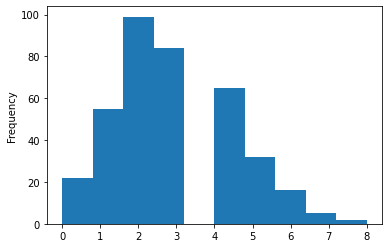

In [ ]:
#histogram of total goals scored
total_goals_per_game_df = soccer_df["FTHG"] + soccer_df["FTAG"]
total_goals_per_game.plot(kind = "hist")


This histogram shows the distribution of total goals scored throughout the season. 